In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from cola import torch_fns
from cola.basic_operations import lazify
from cola.algorithms.preconditioners import get_nys_approx
from cola.algorithms.preconditioners import estimate_approx_error
from tests.utils import generate_spectrum, generate_pd_from_diag

sns.set(style="whitegrid", font_scale=1.5, rc={"lines.linewidth": 3.0, "axes.grid": True})
sns.set_palette("Set1")
palette = sns.color_palette(n_colors=4)

## Case 1

In [2]:
xnp = torch_fns
dtype = xnp.float32
coeff, size = 0.1, int(2 ** 10)
diag = generate_spectrum(coeff=coeff, scale=1.0, size=size)
A = lazify(xnp.array(generate_pd_from_diag(diag, dtype=diag.dtype), dtype=dtype))
rank_init, mult = 4, 2
rank_max, tol = A.shape[0], 1e-5

ranks, rank = [], rank_init
while rank <= rank_max:
    ranks.append(rank)
    rank = int(rank * mult)

errors = np.zeros(shape=len(ranks))
lam_min = np.zeros(shape=len(ranks))

for idx, rank in enumerate(ranks):
    Omega = xnp.randn(*(A.shape[0], rank), dtype=A.dtype)
    Lambda, U = get_nys_approx(A, Omega, eps=1e-8)
    errors[idx] = estimate_approx_error(A, Lambda, U, tol=1e-7, max_iter=1000)
    lam_min[idx] = np.array(xnp.min(Lambda))

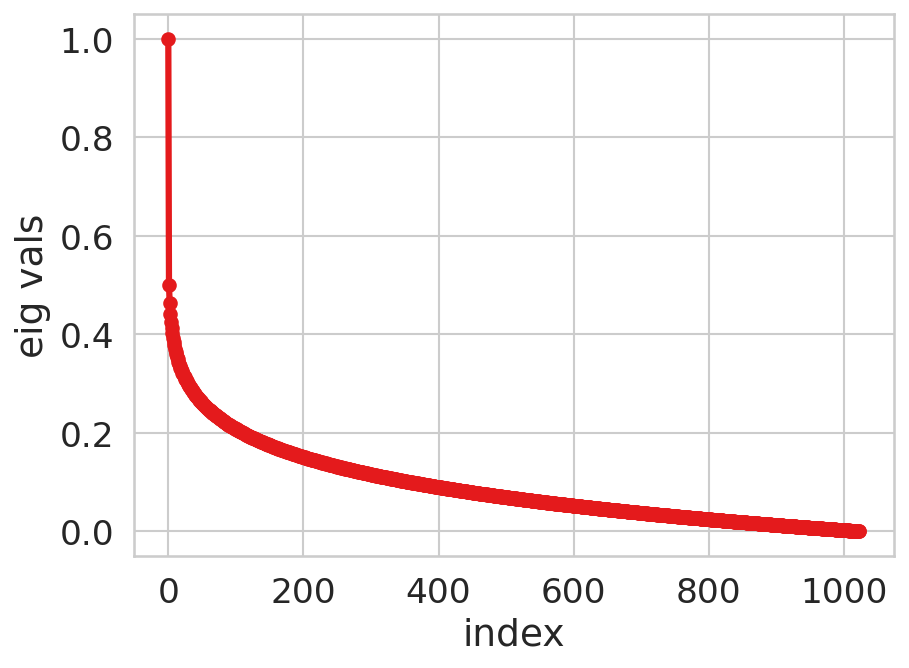

In [3]:
plt.figure(dpi=150)
plt.plot(np.arange(len(diag)), diag, color=palette[0])
plt.scatter(np.arange(len(diag)), diag, color=palette[0])
plt.ylabel("eig vals")
plt.xlabel("index")
plt.tight_layout()
plt.show()

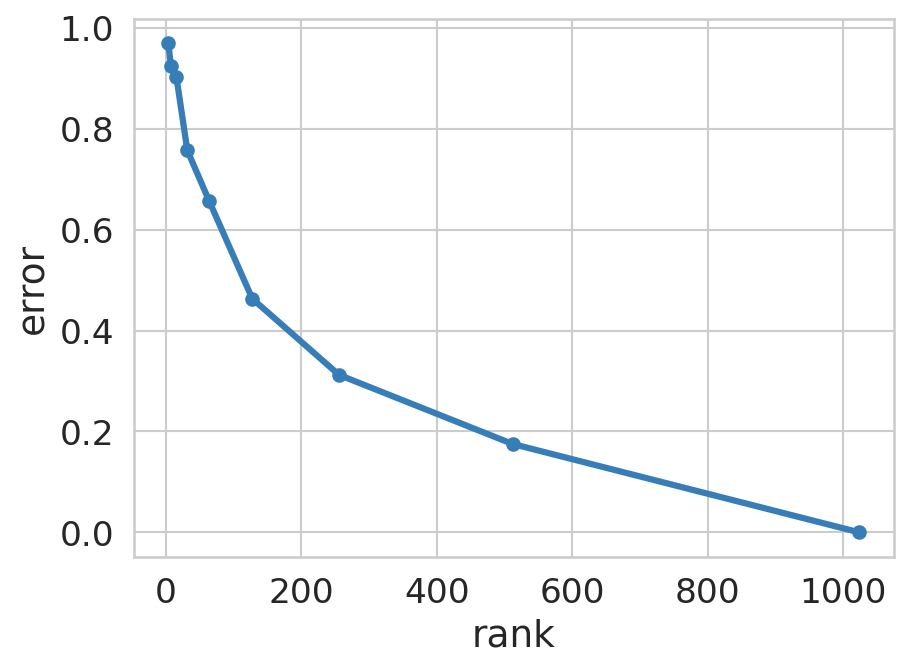

In [4]:
plt.figure(dpi=150)
plt.plot(ranks, errors, color=palette[1])
plt.scatter(ranks, errors, color=palette[1])
plt.ylabel("error")
plt.xlabel("rank")
plt.tight_layout()
plt.show()

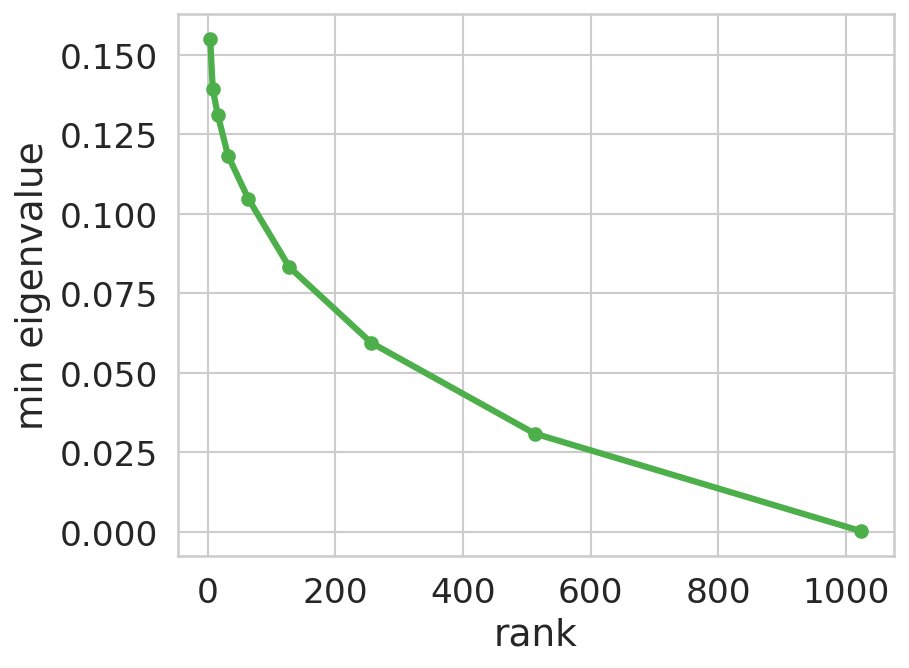

In [5]:
plt.figure(dpi=150)
plt.plot(ranks, lam_min, color=palette[2])
plt.scatter(ranks, lam_min, color=palette[2])
plt.ylabel("min eigenvalue")
plt.xlabel("rank")
plt.tight_layout()
plt.show()

## Case 2

In [6]:
xnp = torch_fns
dtype = xnp.float32
coeff, size = 0.5, int(2 ** 10)
diag = generate_spectrum(coeff=coeff, scale=1.0, size=size)
A = lazify(xnp.array(generate_pd_from_diag(diag, dtype=diag.dtype), dtype=dtype))
rank_init, mult = 4, 2
rank_max, tol = A.shape[0], 1e-5

ranks, rank = [], rank_init
while rank <= rank_max:
    ranks.append(rank)
    rank = int(rank * mult)

errors = np.zeros(shape=len(ranks))
lam_min = np.zeros(shape=len(ranks))

for idx, rank in enumerate(ranks):
    Omega = xnp.randn(*(A.shape[0], rank), dtype=A.dtype)
    Lambda, U = get_nys_approx(A, Omega, eps=1e-8)
    errors[idx] = estimate_approx_error(A, Lambda, U, tol=1e-7, max_iter=1000)
    lam_min[idx] = np.array(xnp.min(Lambda))

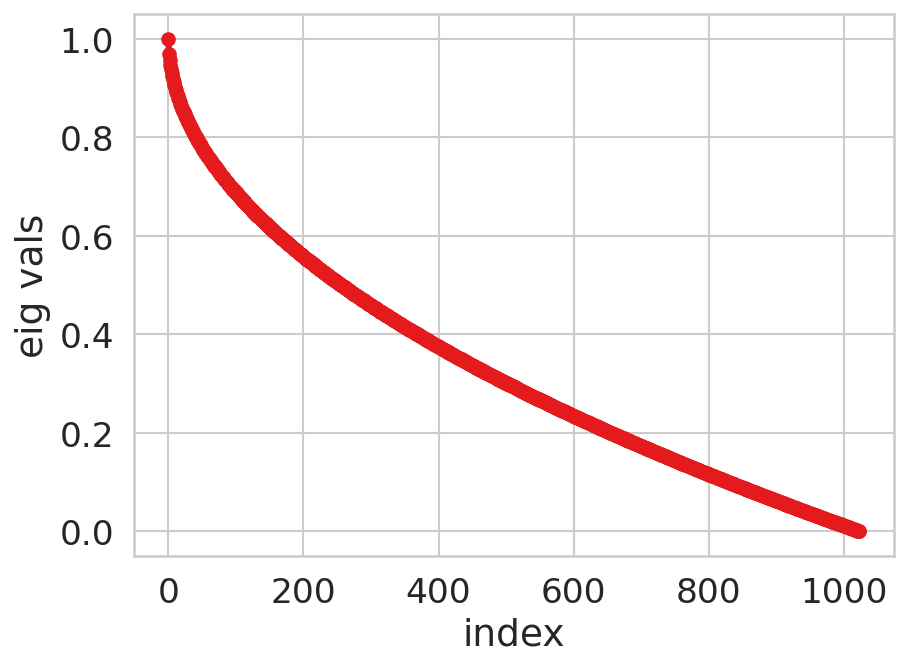

In [7]:
plt.figure(dpi=150)
plt.plot(np.arange(len(diag)), diag, color=palette[0])
plt.scatter(np.arange(len(diag)), diag, color=palette[0])
plt.ylabel("eig vals")
plt.xlabel("index")
plt.tight_layout()
plt.show()

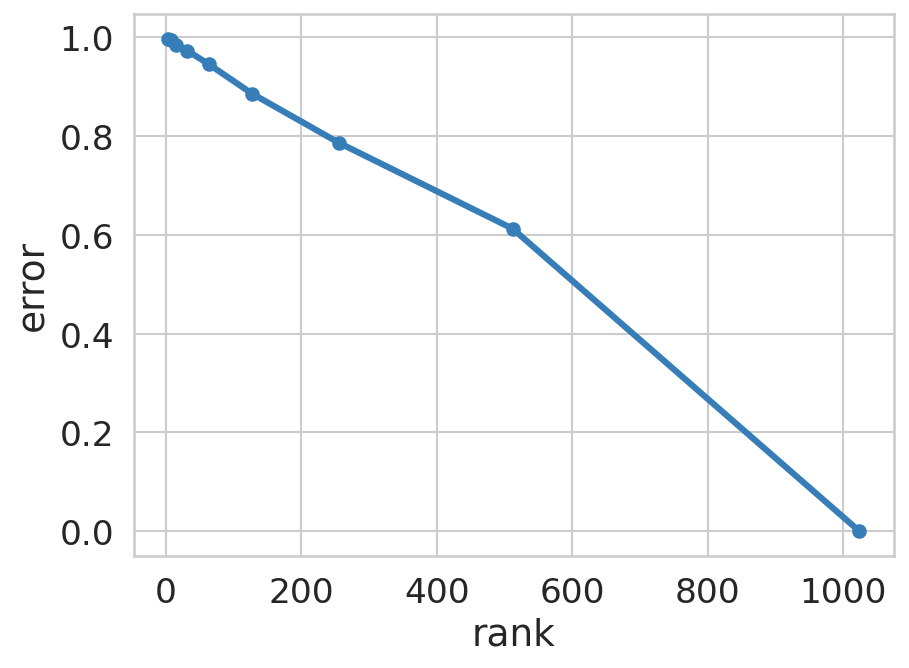

In [8]:
plt.figure(dpi=150)
plt.plot(ranks, errors, color=palette[1])
plt.scatter(ranks, errors, color=palette[1])
plt.ylabel("error")
plt.xlabel("rank")
plt.tight_layout()
plt.show()

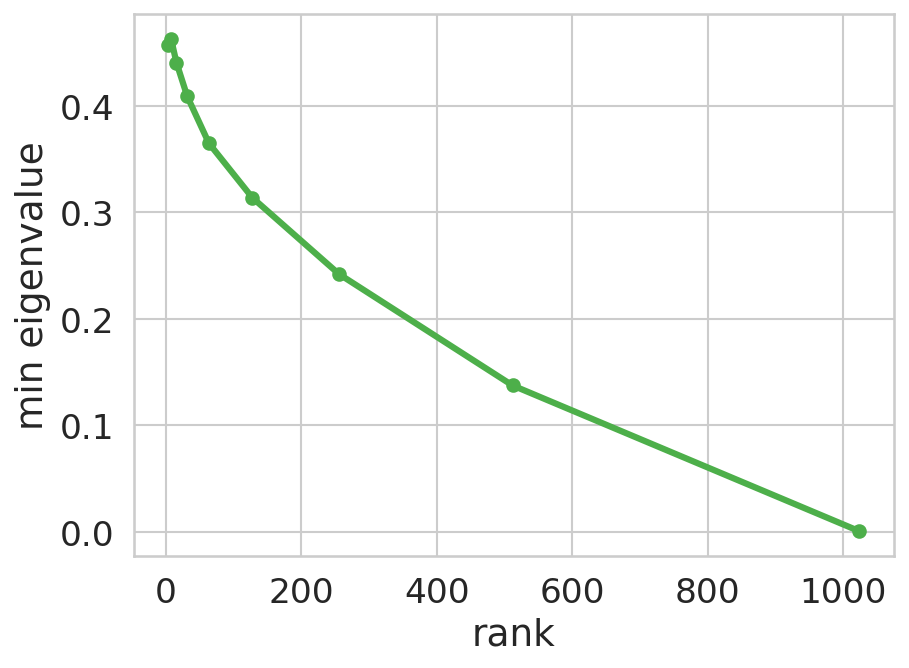

In [9]:
plt.figure(dpi=150)
plt.plot(ranks, lam_min, color=palette[2])
plt.scatter(ranks, lam_min, color=palette[2])
plt.ylabel("min eigenvalue")
plt.xlabel("rank")
plt.tight_layout()
plt.show()